In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from matplotlib import style

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
data = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
columnsToDrop = ['CustomerID', 'Gender', 'Age']
data.drop(columnsToDrop, axis=1, inplace=True)
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [3]:
datak = data
datak

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


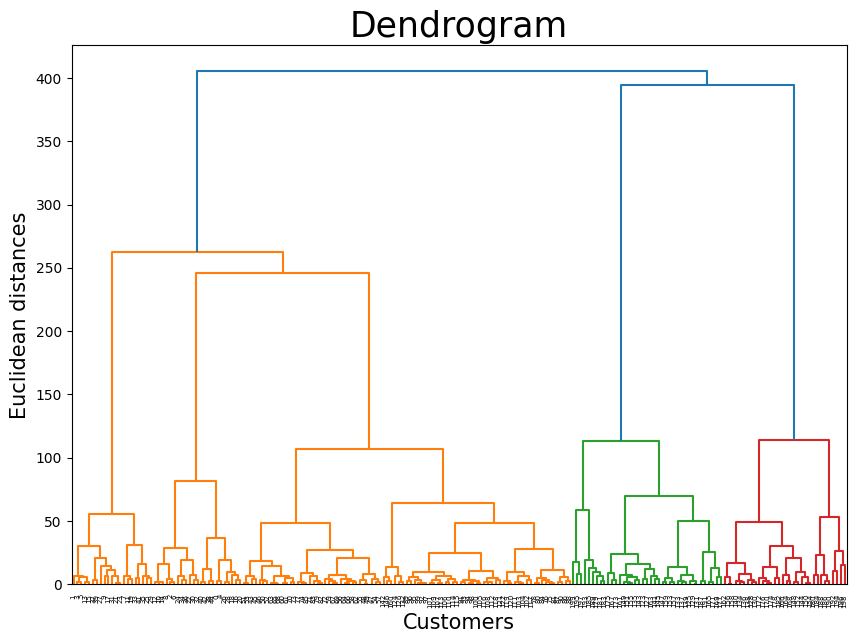

In [4]:
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize = (10,7))
linkage_data = linkage(data, method='ward', metric='euclidean') # linkage calculates the distance and similarities between samples. Euclidean is used to calculate distance between 2 points
                                                                # method "ward" minimize the variance inside the cluster.it is an optimized algo
Dendrogram = dendrogram(linkage_data)
plt.title('Dendrogram', fontsize = 25)
plt.xlabel('Customers', fontsize = 15)
plt.ylabel('Euclidean distances',fontsize = 15)
plt.show()

In [5]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5)
y_pred = hc.fit_predict(data)

data = data.values

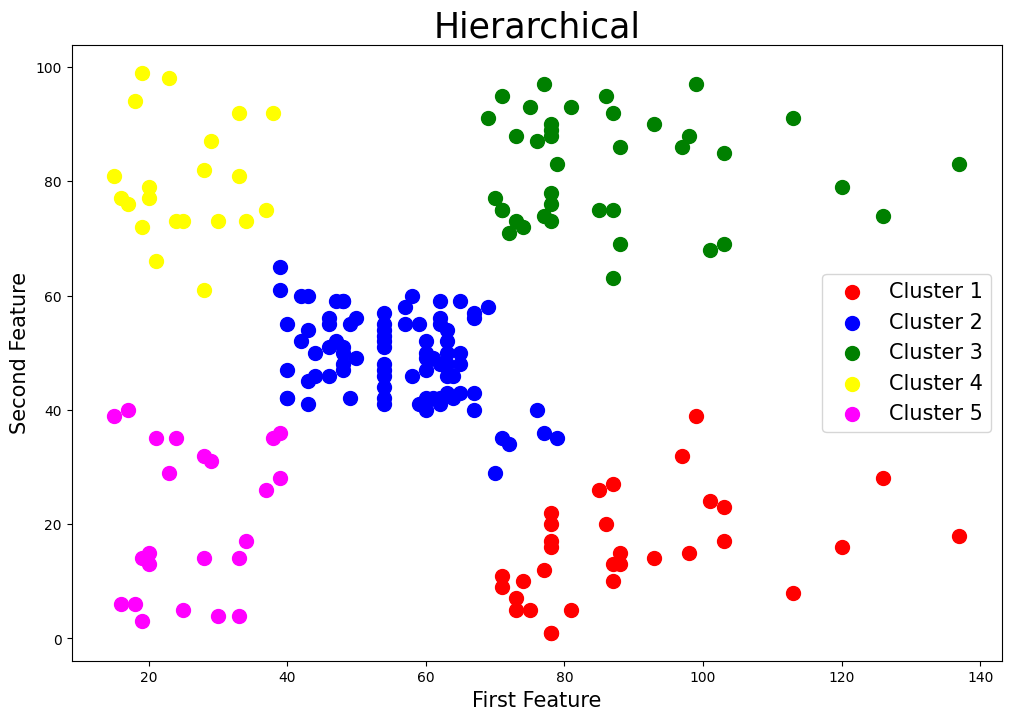

In [6]:
plt.figure(figsize = (12,8))
plt.scatter(data[y_pred == 0 , 0], data[y_pred == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data[y_pred == 1 , 0], data[y_pred == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data[y_pred == 2 , 0], data[y_pred == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data[y_pred == 3 , 0], data[y_pred == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(data[y_pred == 4 , 0], data[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Hierarchical', fontsize = 25)
plt.xlabel('First Feature', fontsize = 15)
plt.ylabel('Second Feature', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [7]:
from sklearn.metrics import silhouette_score

print(f'Silhouette Score(n = 5) : {silhouette_score(data, y_pred)}')

Silhouette Score(n = 5) : 0.5529945955148897


For 4 clusters (as comparison)

In [8]:
hc = AgglomerativeClustering(n_clusters = 4)
y_pred = hc.fit_predict(data)
print(f'Silhouette Score(n = 4) : {silhouette_score(data, y_pred)}')

Silhouette Score(n = 4) : 0.4916598193892782


In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init ='auto')
  kmeans.fit(datak)
  wcss.append(kmeans.inertia_)
print(wcss)

[269981.28, 183653.32894736843, 106348.37306211119, 73679.78903948834, 44454.47647967974, 38813.772331834836, 35470.19493257572, 29407.31584643427, 23552.001406926407, 21652.24499000999]


In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 5, init = 'k-means++',random_state = 42)
y_pred_KMeans = kmeans.fit_predict(datak)

y_pred_KMeans

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5)
y_pred = hc.fit_predict(data)

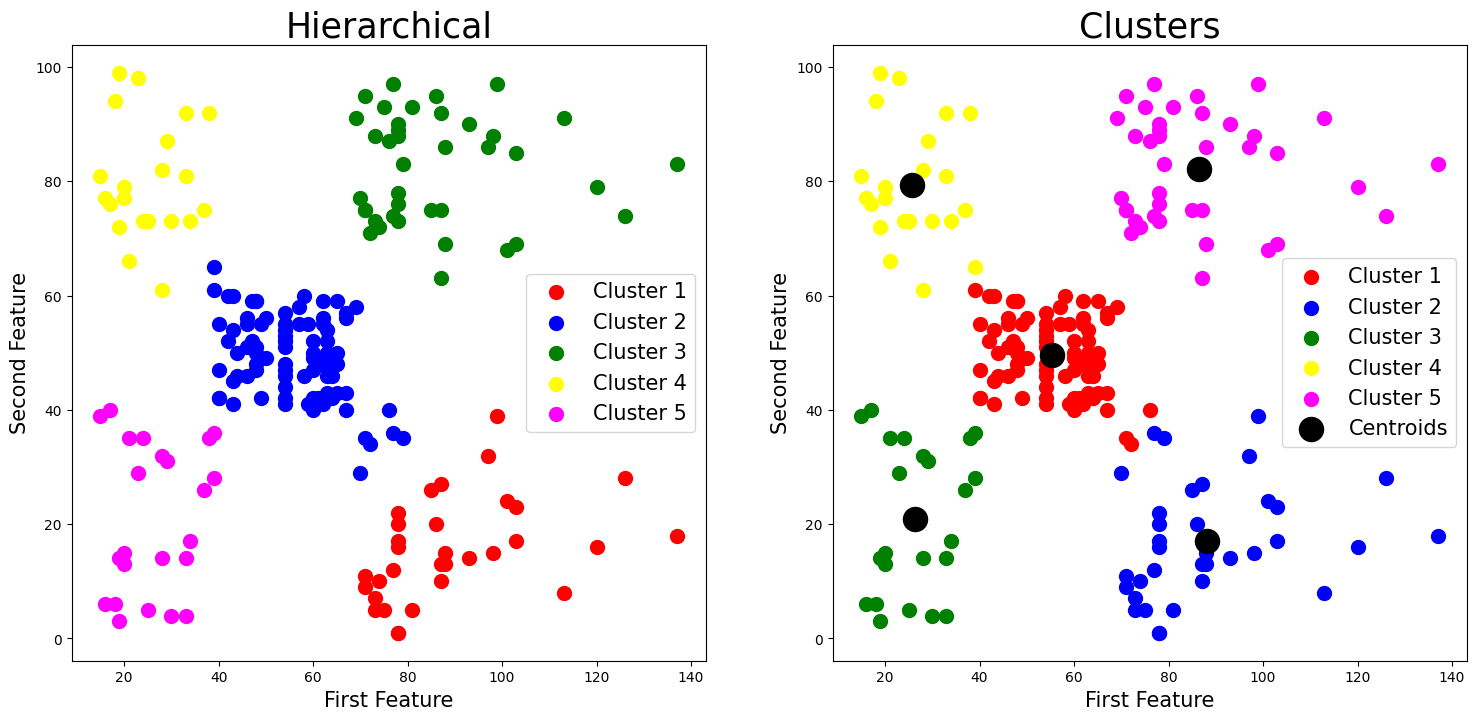

In [12]:
import matplotlib.pyplot as plt

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Hierarchical clustering result on the first subplot
axs[0].scatter(data[y_pred == 0, 0], data[y_pred == 0, 1], s=100, c='red', label='Cluster 1')
axs[0].scatter(data[y_pred == 1, 0], data[y_pred == 1, 1], s=100, c='blue', label='Cluster 2')
axs[0].scatter(data[y_pred == 2, 0], data[y_pred == 2, 1], s=100, c='green', label='Cluster 3')
axs[0].scatter(data[y_pred == 3, 0], data[y_pred == 3, 1], s=100, c='yellow', label='Cluster 4')
axs[0].scatter(data[y_pred == 4, 0], data[y_pred == 4, 1], s=100, c='magenta', label='Cluster 5')
axs[0].set_title('Hierarchical', fontsize=25)
axs[0].set_xlabel('First Feature', fontsize=15)
axs[0].set_ylabel('Second Feature', fontsize=15)
axs[0].legend(fontsize=15)

# KMeans clustering result on the second subplot
axs[1].scatter(data[y_pred_KMeans == 0, 0], data[y_pred_KMeans == 0, 1], s=100, c='red', label='Cluster 1')
axs[1].scatter(data[y_pred_KMeans == 1, 0], data[y_pred_KMeans == 1, 1], s=100, c='blue', label='Cluster 2')
axs[1].scatter(data[y_pred_KMeans == 2, 0], data[y_pred_KMeans == 2, 1], s=100, c='green', label='Cluster 3')
axs[1].scatter(data[y_pred_KMeans == 3, 0], data[y_pred_KMeans == 3, 1], s=100, c='yellow', label='Cluster 4')
axs[1].scatter(data[y_pred_KMeans == 4, 0], data[y_pred_KMeans == 4, 1], s=100, c='magenta', label='Cluster 5')
axs[1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')
axs[1].set_title('Clusters', fontsize=25)
axs[1].set_xlabel('First Feature', fontsize=15)
axs[1].set_ylabel('Second Feature', fontsize=15)
axs[1].legend(fontsize=15)



# Show the plots side by side
plt.show()

In [13]:
import sklearn
sklearn.metrics.calinski_harabasz_score(data, y_pred_KMeans)

247.35899338037282